## -----Import libraries-----

In [474]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ----- Load dataset-----

In [476]:
df=pd.read_csv('C:/Users/devma/Downloads/ML case Study.csv')
dfc=pd.read_csv('C:/Users/devma/Downloads/Colleges.csv')
dfcity=pd.read_csv('C:/Users/devma/Downloads/Cities.csv')

In [477]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [478]:
dfc.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [479]:
dfcity.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# EDA(Exploratory Data Analysis)

In [481]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


## ----- NULL VALUES-----

In [483]:
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

## -----DUPLICATE VALUES-----

In [485]:
df[df.duplicated()]

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC


## ----- create list from college dataset-----

In [487]:
Tier1=dfc["Tier 1"].tolist()
Tier2=dfc["Tier 2"].tolist()
Tier3=dfc["Tier 3"].tolist()

#convert tiers to numeric
dfc.dropna()
for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1 ,inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2 ,inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3 ,inplace=True)

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2181322465.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["College"].replace(item, 2 ,inplace=True)
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2181322465.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

 # Convert City to metro and non-metro city

In [489]:
#create list from city dataset
Metro=dfcity["Metrio City"].tolist()
non_metro=dfcity["non-metro cities"].tolist()

#convert city to numeric
dfcity.dropna()
for item in df.City:
    if item in Metro:
        df["City"].replace(item, 1 ,inplace=True)
    elif item in non_metro:
        df["City"].replace(item, 0 ,inplace=True)

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\1068939333.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].replace(item, 0 ,inplace=True)
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\1068939333.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

# create dummy veriables for Role

In [491]:
df=pd.get_dummies(df,columns=['Role']).astype(int)

In [492]:
#drop Role_Manager columns
df=df.drop(columns=['Role_Manager'])

In [493]:
#Rename Role_Executive to Role
df=df.rename(columns={'Role_Executive': 'Role'})
#Executive=1 and Manager=0

In [494]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role
0,2,0,55523,3,66,19,71406,0
1,2,0,57081,1,84,18,68005,1
2,3,0,60347,2,52,28,76764,1
3,3,0,49010,2,81,33,82092,1
4,1,0,57879,4,74,32,73878,1


In [495]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.793581
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,1.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,1.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,1.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int32
 1   City                 1589 non-null   int32
 2   Previous CTC         1589 non-null   int32
 3   Previous job change  1589 non-null   int32
 4   Graduation Marks     1589 non-null   int32
 5   EXP (Month)          1589 non-null   int32
 6   CTC                  1589 non-null   int32
 7   Role                 1589 non-null   int32
dtypes: int32(8)
memory usage: 49.8 KB


# visualization

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2026680196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='College', y='CTC', data=df, estimator=sum, palette="pastel")
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2026680196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='College', y='CTC', data=df, estimator=sum, palette=["#F4BB00", "#3498DB", "#B70000"])


<Axes: xlabel='College', ylabel='CTC'>

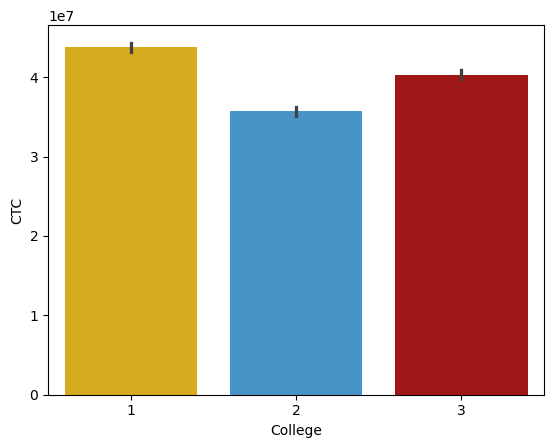

In [498]:
#college vs CTC
sns.barplot(x='College', y='CTC', data=df, estimator=sum, palette="pastel") 
sns.barplot(x='College', y='CTC', data=df, estimator=sum, palette=["#F4BB00", "#3498DB", "#B70000"]) 

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2774134169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='CTC', data=df, estimator=sum, palette="pastel")
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2774134169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='CTC', data=df, estimator=sum, palette=["#FF5733", "#3498DB", "#2ECC71"])
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\2774134169.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='City', y='CTC', data=df, estimator=sum, palette=["#FF5733", "#3498DB", "#2ECC71"])


Text(0.5, 1.0, 'City vs CTC')

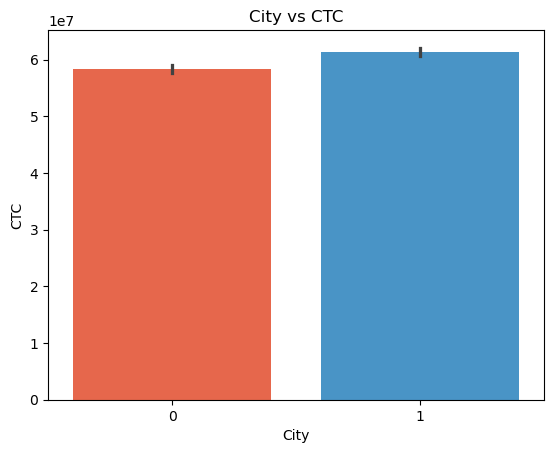

In [499]:
#City vs CTC
sns.barplot(x='City', y='CTC', data=df, estimator=sum, palette="pastel") 
sns.barplot(x='City', y='CTC', data=df, estimator=sum, palette=["#FF5733", "#3498DB", "#2ECC71"]) 
plt.title('City vs CTC')

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\4218448374.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'],color="#B70000")


Text(0.5, 1.0, 'Distribution of CTC')

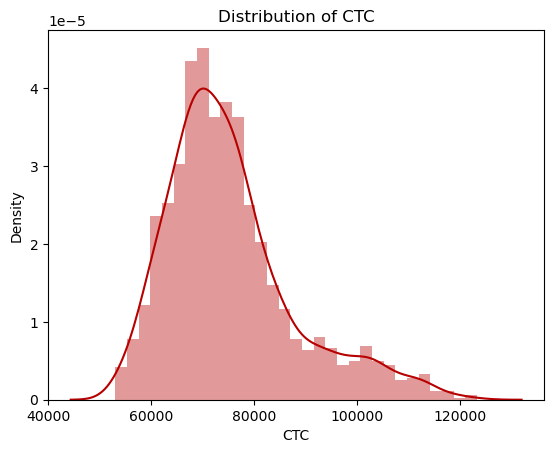

In [661]:
#CTC
sns.distplot(df['CTC'],color="#B70000")
plt.title('Distribution of CTC')

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\168443922.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='EXP (Month)', y='CTC', data=df, palette="pastel") # Use a Seaborn palette
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\168443922.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='EXP (Month)', y='CTC', data=df, palette=["#FF5733", "#3498DB", "#2ECC71"]) # Custom palette


Text(0.5, 1.0, 'Experience vs CTC')

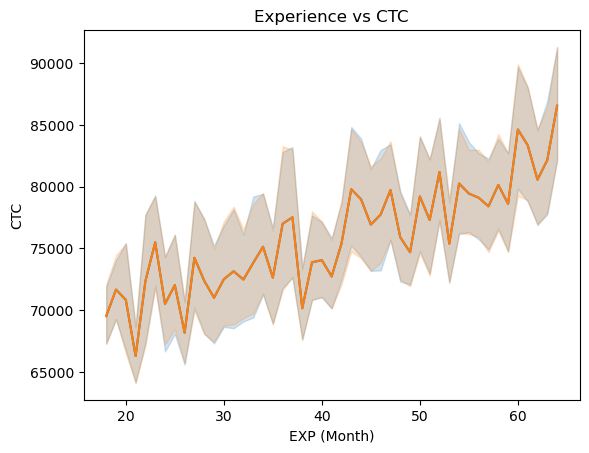

In [501]:
#EXPERIENCE VS CTC
sns.lineplot(x='EXP (Month)', y='CTC', data=df, palette="pastel") # Use a Seaborn palette
sns.lineplot(x='EXP (Month)', y='CTC', data=df, palette=["#FF5733", "#3498DB", "#2ECC71"]) # Custom palette
plt.title('Experience vs CTC')

C:\Users\devma\AppData\Local\Temp\ipykernel_3308\3082048536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Role', y='CTC', data=df, estimator=sum, palette="pastel")
C:\Users\devma\AppData\Local\Temp\ipykernel_3308\3082048536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Role', y='CTC', data=df, estimator=sum, palette="muted")


<Axes: xlabel='Role', ylabel='CTC'>

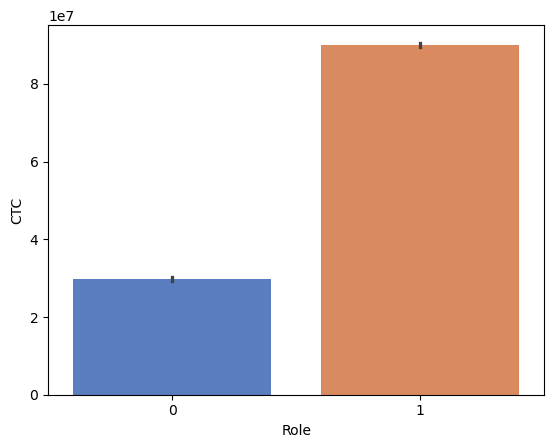

In [502]:
#DISTRIBUTION OF ROLE  EXECUTIVE =1 AND MANAGER=0 
sns.barplot(x='Role', y='CTC', data=df, estimator=sum, palette="pastel")
sns.barplot(x='Role', y='CTC', data=df, estimator=sum, palette="muted") 

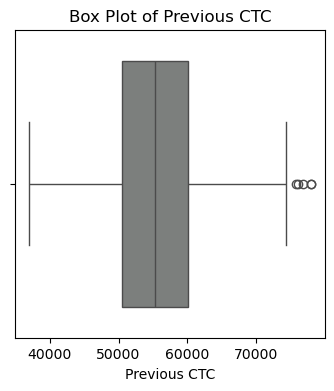

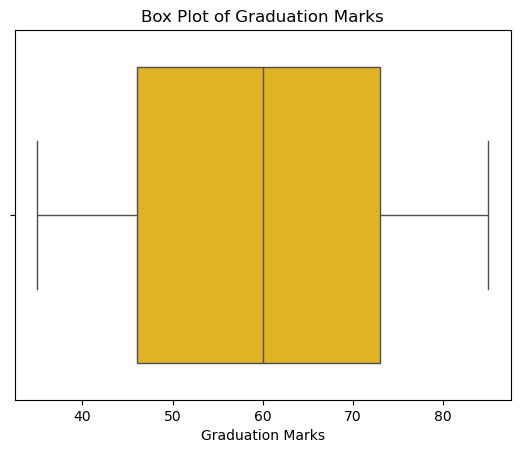

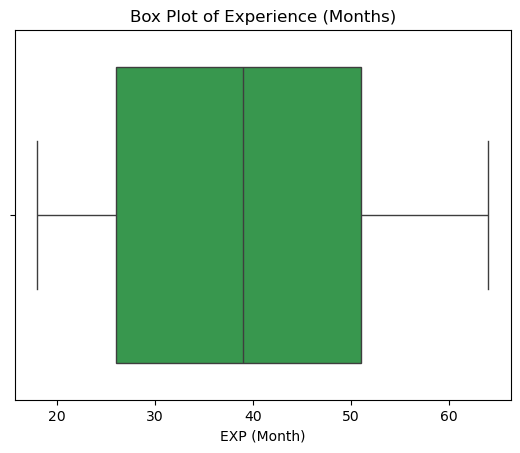

In [503]:
#outlier
plt.figure(figsize=(4, 4))

sns.boxplot(x=df['Previous CTC'],color="#7b7f7d")
plt.title('Box Plot of Previous CTC')
plt.show()

sns.boxplot(x=df['Graduation Marks'], color="#ffc107")
plt.title('Box Plot of Graduation Marks')
plt.show()

sns.boxplot(x=df['EXP (Month)'], color="#28a745")
plt.title('Box Plot of Experience (Months)')
plt.show()

In [504]:
#outlier treatment
Q1 = df['Previous CTC'].quantile(0.25)
Q3 = df['Previous CTC'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Previous CTC'] = df['Previous CTC'].clip(lower=lower_bound, upper=upper_bound)

<Axes: xlabel='Previous CTC'>

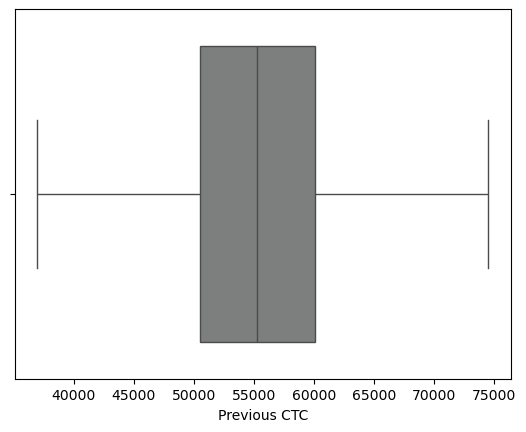

In [505]:
#after outlier treatment
sns.boxplot(x=df['Previous CTC'],color="#7b7f7d")

# Correlation

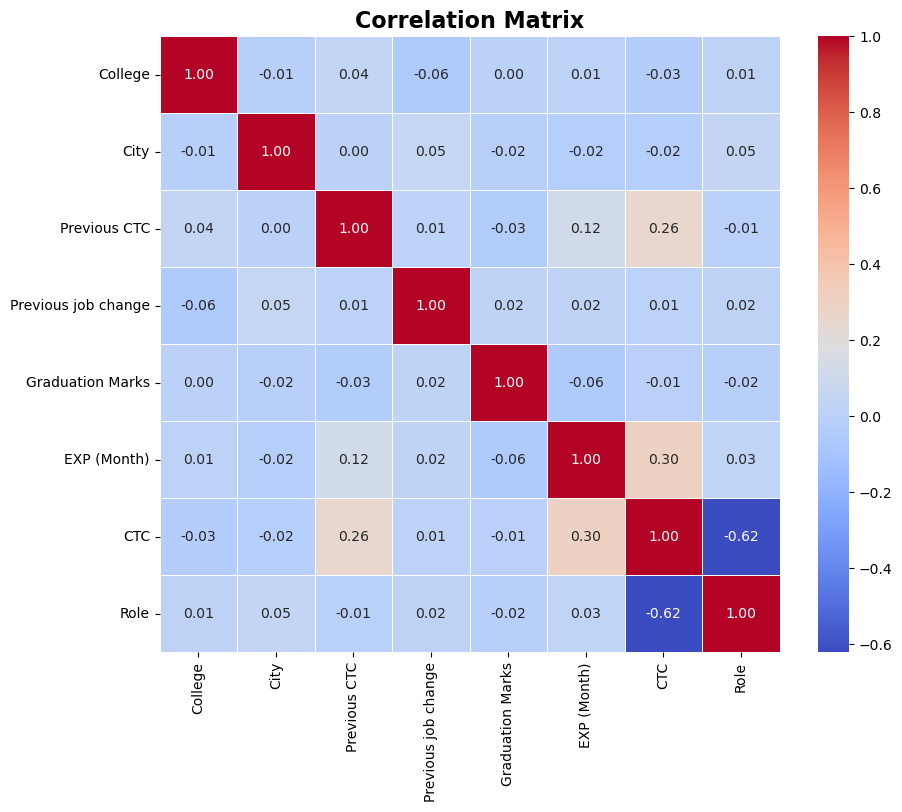

In [507]:
#find correlation 
# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 10})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')  # Add a title with styling
plt.show()

In [508]:
df.corr()['CTC']

College               -0.029592
City                  -0.020365
Previous CTC           0.257991
Previous job change    0.011370
Graduation Marks      -0.005449
EXP (Month)            0.301117
CTC                    1.000000
Role                  -0.621310
Name: CTC, dtype: float64

#data preprocessing

In [510]:
from sklearn.preprocessing import StandardScaler

In [511]:
from sklearn.model_selection import train_test_split

In [512]:
# Splitting the dataset into train and text 
X = df.drop(columns=['CTC'])
y = df['CTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [513]:
#transform the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LinearRegression

In [515]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [516]:
lrm=LinearRegression()

In [517]:
lrm.fit(X_train_scaled,y_train)

LinearRegression()

In [518]:
lrm_pred=lrm.predict(X_test_scaled)

In [519]:
mae = mean_squared_error(y_test,lrm_pred)
print("Mean squard Error:", mae)
print(r2_score(y_test,lrm_pred))

Mean squard Error: 77375499.68905339
0.5932853963054503


# Ridge Regression

In [521]:
from sklearn.linear_model import Ridge

In [522]:
ridge_model = Ridge(alpha=0.1)  

In [523]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [524]:
rg_pred = ridge_model.predict(X_test_scaled)

In [525]:
mae = mean_absolute_error(y_test, rg_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 7192.33298570705


In [526]:
print(r2_score(y_test,rg_pred))

0.5932717648610576


# Lasso Regression

In [528]:
from sklearn.linear_model import Lasso

In [529]:
lasso_model = Lasso(alpha=2.0) 

In [530]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=2.0)

In [531]:
ls_pred = lasso_model.predict(X_test_scaled)

In [532]:
mae = mean_absolute_error(y_test, ls_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 7192.854485329932


In [533]:
print(r2_score(y_test,ls_pred))

0.5932159392872651


# RandomForestRegressor

In [535]:
from sklearn.ensemble import RandomForestRegressor

In [536]:
rf_model=RandomForestRegressor(n_estimators=50,n_jobs=-1,max_depth=10)

In [537]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1)

In [538]:
rf_pred = rf_model.predict(X_test_scaled)

In [539]:
print("Random Forest RMSE:", mean_squared_error(y_test, rf_pred,squared=False))

Random Forest RMSE: 8343.992203353326


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [540]:

print(r2_score(y_test,rf_pred))

0.6340396121442611


# Gradient Boosting

In [542]:
from sklearn.ensemble import GradientBoostingRegressor

In [543]:
import pickle

In [544]:
gb_model = GradientBoostingRegressor(n_estimators=250,max_depth=5,random_state= 0)

In [545]:
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250, random_state=0)

In [546]:
gb_pred = gb_model.predict(X_test_scaled)

In [547]:
print("Gradient Boosting RMSE:", mean_squared_error(y_test, gb_pred, squared=False))

Gradient Boosting RMSE: 8442.248128946205


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [548]:
print(r2_score(y_test,gb_pred))

0.6253700235731101


# DecisionTreeRegressor with AdaBoost

In [550]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [551]:
dt = DecisionTreeRegressor(max_depth=9)

In [552]:
adaboost_model = AdaBoostRegressor(estimator=dt, n_estimators=350, random_state=42)

In [553]:
adaboost_model.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9),
                  n_estimators=350, random_state=42)

In [554]:
ad_pred = adaboost_model.predict(X_test_scaled)

In [555]:
mae = mean_absolute_error(y_test, ad_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6263.7228737762625


In [556]:
print(r2_score(y_test,ad_pred))

0.6421580740235777


# RandomForestRegressor with AdaBoostRegressor

In [558]:
from sklearn.ensemble import AdaBoostRegressor

In [559]:
ada_boost_reg = AdaBoostRegressor(estimator=rf_model,n_estimators=350, random_state=42)

In [560]:
ada_boost_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=10, n_estimators=50,
                                                  n_jobs=-1),
                  n_estimators=350, random_state=42)

In [561]:
ada_pred = ada_boost_reg.predict(X_test_scaled)

In [562]:
mae = mean_absolute_error(y_test, ada_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6510.103658892737


In [563]:
print(r2_score(y_test,ada_pred))

0.6359033561240657


# KNeighborsRegressor

In [565]:
from sklearn.neighbors import KNeighborsRegressor

In [566]:
knn_model = KNeighborsRegressor(n_neighbors=9)

In [567]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [568]:
kn_pred = knn_model.predict(X_test_scaled)

In [569]:
mae = mean_absolute_error(y_test, kn_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6953.705450733752


In [570]:
print(r2_score(y_test,kn_pred))

0.617963734514084


# result of all models

In [572]:
print(1)
print("Linear Regression R2 score:                           ",r2_score(y_test,lrm_pred)*100)
print(2)
print("Ridge Regression R2 score:                            ",r2_score(y_test,rg_pred)*100)
print(3)
print("Lesso Regression R2 score:                            ",r2_score(y_test,ls_pred)*100)
print(4)
print("Random Forest Regressor R2 score:                     ",r2_score(y_test,rf_pred)*100)
print(5)
print("Gradient Boosting R2 score:                           ",r2_score(y_test,gb_pred)*100)
print(6)
print("Decision Tree Regressor with AdaBoost R2 score:       ",r2_score(y_test,ad_pred)*100)
print(7)
print("RandomForestRegressor with AdaBoostRegressor R2 score:",r2_score(y_test,ada_pred)*100)
print(8)
print("K Neighbors Regressor R2 score:                       ",r2_score(y_test,kn_pred)*100)


1
Linear Regression R2 score:                            59.32853963054503
2
Ridge Regression R2 score:                             59.327176486105756
3
Lesso Regression R2 score:                             59.321593928726514
4
Random Forest Regressor R2 score:                      63.403961214426104
5
Gradient Boosting R2 score:                            62.53700235731101
6
Decision Tree Regressor with AdaBoost R2 score:        64.21580740235777
7
RandomForestRegressor with AdaBoostRegressor R2 score: 63.59033561240657
8
K Neighbors Regressor R2 score:                        61.79637345140841


# Answers to Questions:

1.Your views about the problem statement?

THE PROBLEM STAEMENT IS TO PREDICTING EMPLOYEE SALARY/CTC.SO THIS IS REGRESSION PROBLEM WHERE SALARY IS CUNTINUS DEPANDENT VARIABLE.

2.What will be your approach to solving this task?

MY APPROCH TO SOLVING THIS TASK INCLUED IS DATA PREPROCESSING,HANDLING MISSING VALUES,OUTLIERS,CONVERT CATEGORICAL VARIABLE TO NUMERICAL .THEN I TEST MANY MODELS AND CHECK THEIR PERFORMANCE .

3.What were the available ML model options you had to perform this task?

FOR THIS TASK I USE LINEAR REGRESSION,RIDGE REGRESSION,Lasso regression,Random Forest Regressor,Gradient Boosting,Decision Tree Regressor,K Neighbors Regressor,AdaBoost.

4.Which model’s performance is best and what could be the possible reason for that?

The model with the best performance is Decision Tree Regressor with AdaBoost that achieves highest R-squared value(64.21580740235777) during evaluation.

5.What steps can you take to improve this selected model’s performance even further?

To improve this Decision Tree Regressor with AdaBoost model’s performance i would like to experiment with hyperparameter tuning,add new features ,Experimenting with ensemble methods.